In [1]:
import warnings
warnings.simplefilter('ignore')

import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os as os
import seaborn as sn

from sklearn.metrics import f1_score
from keras.callbacks import Callback
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score as accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.layers import Activation, Dense
from keras.models import Sequential, Sequential
from keras.preprocessing import sequence
from keras import metrics
import keras.backend as K

Using TensorFlow backend.


In [2]:
def creat_dataset(read_data, window_size):
    #データの読み込み、plot関数
    def create_values(read_data):
        #データの読み込み
        data = pd.read_csv(read_data, sep=',')
        
        #データのrssi、metreをそれぞれx、yとして定義
        x = data.rssi
        y = data.label
        
        return x, y
    
    def get_label_name(labels):
        for i in range(len(labels)):
            if labels == 'far': 
                label = 0
            elif labels == 'near': 
                label = 1
            elif labels == 'leave':
                label = 2
            elif labels == 'approach':
                label = 3
            else:
                label = 4
        return label
    
    list_X, list_Y = create_values(read_data)
    
    #Xを正の値に直して正規化
    min_ = 40
    max_ = 120
    list_X = (abs(list_X) -  min_)/ (max_ - min_)
    
    list_metre = []  #labelのlist
    list_rssi = []   #rssiのlist

    #list_Xをwindow_sizeごとにサンプリング
    for i in range(0, len(list_X) - window_size, 1):
        list_rssi.append(list_X[i:i+window_size].values)
    
    #list_Yをwindow_sizeごとにサンプリング
    for i in range(0, len(list_Y) - window_size, 1):
        list_metre.append(get_label_name(list_Y[i+window_size]))
        
    data = np.array(list_rssi)
    label = np.array(list_metre)
    
    data = data.reshape(len(data), window_size, 1, 1)
    label = label.reshape(len(label), 1)
    
    return data, label

In [3]:
window = 35
train_x, train_y = creat_dataset("../data/data_0", window)
test_x, test_y = creat_dataset("../data/data_1", window)
val_x, val_y = creat_dataset("../data/data_2", window)

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=160, activation='relu', input_dim=35))
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=80, activation='relu'))
model.add(tf.keras.layers.Dense(units=40, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 160)               5760      
_________________________________________________________________
dense_10 (Dense)             (None, 120)               19320     
_________________________________________________________________
dense_11 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_12 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 164       
Total params: 38,164
Trainable params: 38,164
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=30, activation='relu', input_dim=35))
model.add(tf.keras.layers.Dense(units=20, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=40, activation='relu'))
# model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                1080      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 40)                440       
Total params: 2,350
Trainable params: 2,350
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='sparse_categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])

In [20]:
histry = model.fit(train_x, train_y, epochs=100,
                    verbose=1,units
                    batch_size=128,
                    validation_data = (val_x,  val_y))

Train on 2546 samples, validate on 2455 samples
Epoch 1/100
2546/2546 [==============================] - 1s 459us/sample - loss: 1.2794 - accuracy: 0.3515 - val_loss: 1.1248 - val_accuracy: 0.4790
Epoch 2/100
2546/2546 [==============================] - 0s 89us/sample - loss: 1.0340 - accuracy: 0.5511 - val_loss: 0.9123 - val_accuracy: 0.6428
Epoch 3/100
2546/2546 [==============================] - 0s 66us/sample - loss: 0.8039 - accuracy: 0.7333 - val_loss: 0.7656 - val_accuracy: 0.6415
Epoch 4/100
2546/2546 [==============================] - 0s 83us/sample - loss: 0.6387 - accuracy: 0.7698 - val_loss: 0.6651 - val_accuracy: 0.7271
Epoch 5/100
2546/2546 [==============================] - 0s 80us/sample - loss: 0.5438 - accuracy: 0.8016 - val_loss: 0.8011 - val_accuracy: 0.6212
Epoch 6/100
2546/2546 [==============================] - 0s 58us/sample - loss: 0.4846 - accuracy: 0.8174 - val_loss: 0.5697 - val_accuracy: 0.7658
Epoch 7/100
2546/2546 [==============================] - 0s 60u

In [21]:
loss, acc = model.evaluate(test_x,  test_y, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1552/1 - 0s - loss: 0.2502 - accuracy: 0.8840
Restored model, accuracy: 88.40%


In [22]:
history_dict = histry.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

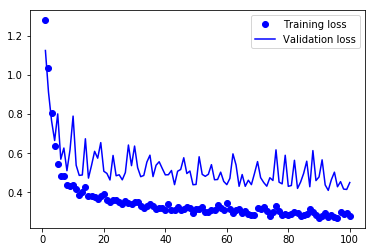

In [23]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.legend()
plt.show()

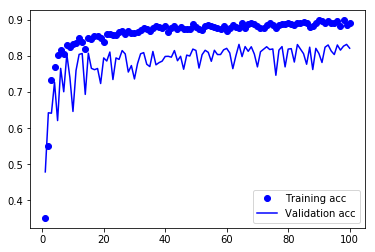

In [24]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()
plt.show()

[[290   0   0  35]
 [  4 272  23  35]
 [ 41  37 387   0]
 [  4   1   0 423]]


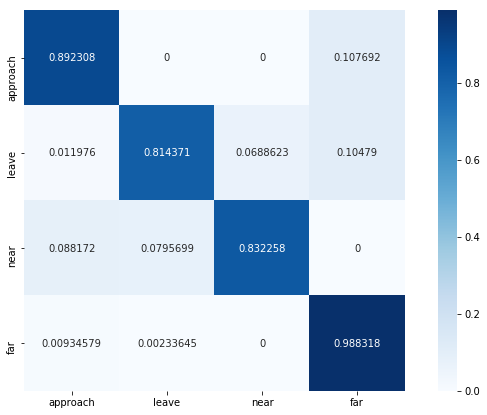

In [25]:
import seaborn as sn

predict_classes = model.predict_classes(test_x)
true_classes = test_y
print(confusion_matrix(true_classes, predict_classes))

def print_cmx(y_true, y_pred):
    labels = ['approach', 'leave', 'near', 'far']
    cmx_data = confusion_matrix(y_true, y_pred)
    
    cmx_data = cmx_data.astype('float') / cmx_data.sum(axis=1)[:, np.newaxis]
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cmx, annot=True, fmt='g', square = True, cmap='Blues')
    plt.show()
 
print_cmx(true_classes, predict_classes)

In [27]:
from sklearn.metrics import precision_recall_fscore_support

x=precision_recall_fscore_support(true_classes,predict_classes)

data = {"適合率": list(x[0]),
        "再現率":list(x[1]),
        "F値":list(x[2]),
       "データ数":list(x[3])}

df = pd.DataFrame(data)
df.index=["approach","leave","near","far"]
df

,適合率,再現率,F値,データ数
approach,0.855457,0.892308,0.873494,325
leave,0.877419,0.814371,0.844720,334
near,0.943902,0.832258,0.884571,465
far,0.858012,0.988318,0.918567,428
